In [1]:
import torch
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

n_samples: 50
x.shape: (50, 1) float64
y.shape: (50, 1) float64


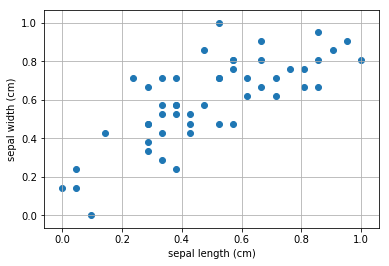

In [2]:
iris = load_iris()
x = iris.data[iris.target==1,::2][:,0:1]
x -= x.min()
x /= x.max()
y = iris.data[iris.target==1,::2][:,1:2]
y -= y.min()
y /= y.max()
n_samples = y.shape[0]
print('n_samples:',n_samples)
print('x.shape:',x.shape, x.dtype)
print('y.shape:',y.shape, y.dtype)
plt.figure()
plt.scatter(x, y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid()
plt.show()

In [3]:
biasx = np.hstack([np.ones((n_samples, 1), dtype=x.dtype), x])
biasx = torch.from_numpy(biasx).type(torch.FloatTensor)
biasx = torch.autograd.Variable(biasx)
y = torch.from_numpy(y).type(torch.FloatTensor)
y = torch.autograd.Variable(y)
print('biasx: {} {}'.format(biasx.data.type(), biasx.data.size()))
print('y:     {} {}'.format(y.data.type(), y.data.size()))

biasx: torch.FloatTensor torch.Size([50, 2])
y:     torch.FloatTensor torch.Size([50, 1])


In [4]:
n_epochs = 100
lr = .1
w = torch.autograd.Variable(torch.zeros(1, 2), requires_grad=True)
w_history = w.data.numpy()
loss_history = list()

for c_epoch in range(n_epochs):
    y_pred = biasx.mm(torch.t(w))
    loss = ((y_pred - y) * (y_pred - y)).mean()
    loss_history.append(loss.data[0])
    #print('{:3d}: {:5.3e}'.format(c_epoch, loss.data.numpy()[0]))
    loss.backward()
    w.data -= lr * w.grad.data
    w.grad.data.zero_()
    w_history = np.vstack([w_history, w.data.numpy()])
loss_history.append(loss.data[0])

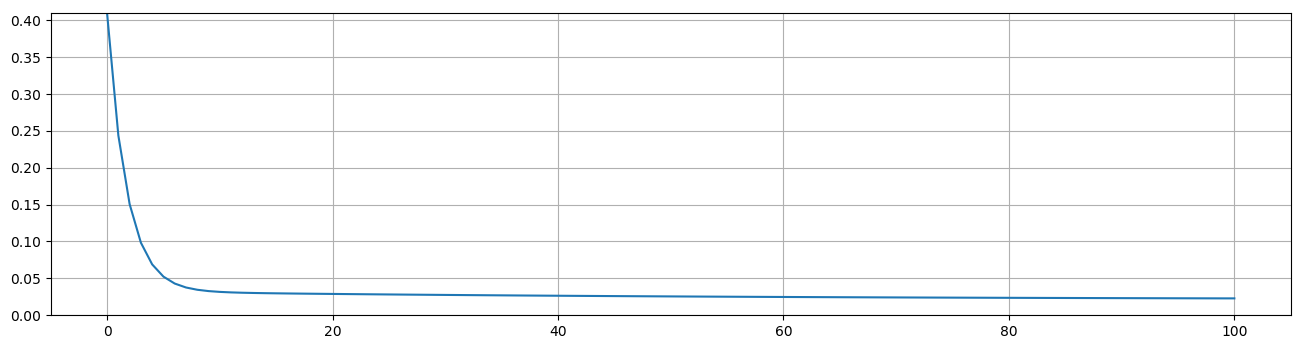

In [5]:
fig = plt.figure(figsize=(16, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(loss_history)
ax.set_ylim(0, max(loss_history))
ax.grid()
plt.show()

w_opt: [ 0.26134154  0.68646991]
final cost (analítica): 0.0211694
[[ 0.3485736 ]
 [ 0.51798731]]


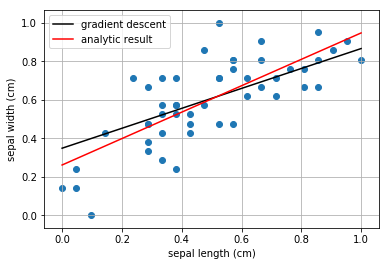

In [6]:
w_opt = (np.linalg.inv((biasx.data.numpy().T).dot(biasx.data.numpy())).dot(biasx.data.numpy().T)).dot(y.data.numpy()).T
print('w_opt: {}'.format(w_opt[0]))
print('final cost (analítica):', ((biasx.data.numpy().dot(w_opt.T) - y.data.numpy()) ** 2).mean())

print(w.data.numpy().T)

plt.figure()
plt.scatter(x, y.data.numpy())
plt.plot([0., 1.], np.array([[1., 0.], [1., 1.]]).dot(w.data.numpy().T), 'k-', label='gradient descent')
plt.plot([0., 1.], np.array([[1., 0.], [1., 1.]]).dot(w_opt.T), 'r-', label='analytic result')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid()
plt.legend()
plt.show()